In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NOTE! Sometimes the code doesn't like the response = requests.get(url) line. In this case, 
# replace it with response = request.get(url, verify=False).

# It will give you a warning, but that's fine. 


In [2]:
# import stream gauge data
url="https://waterservices.usgs.gov/nwis/dv/?format=json&sites=12451000&startDT=2025-12-01&endDT=2025-12-31&parameterCd=00060&statCd=00003"

# download data
response = requests.get(url) 
response.raise_for_status()

# process json data
data = response.json()

# get time series data
time_series = data['value']['timeSeries']

for series in time_series:
    # get discharge values
    site_name = series['sourceInfo']['siteName']
    variable = series['variable']['variableDescription']
    values = series['values'][0]['value']
    
    print(f"Site: {site_name}")
    print(f"Variable: {variable}")
    
    # convert to dataframe
    df = pd.DataFrame(values)
    
    # convert data types of columns to ideal types
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    df['value'] = pd.to_numeric(df['value'])

df=df.drop('qualifiers',axis=1)    
print(df.head())


Site: STEHEKIN RIVER AT STEHEKIN, WA
Variable: Discharge, cubic feet per second
   value   dateTime
0    705 2025-12-01
1    679 2025-12-02
2    646 2025-12-03
3    622 2025-12-04
4    636 2025-12-05


Text(0.5, 1.0, 'Discharge from Stehekin River in December 2025')

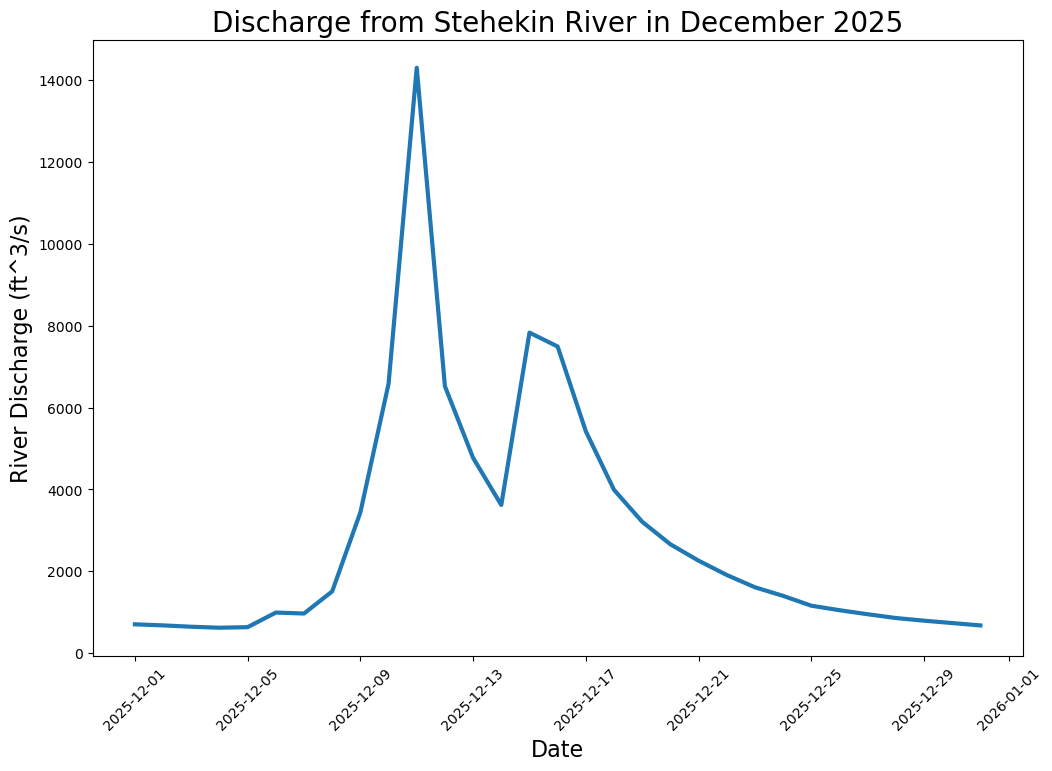

In [3]:
plt.figure(figsize=(12,8))
plt.plot(df['dateTime'],df['value'],linewidth=3);
plt.tick_params(axis='x',labelrotation=45)
plt.xlabel("Date",fontsize=16);
plt.ylabel("River Discharge (ft^3/s)",fontsize=16);
plt.title("Discharge from Stehekin River in December 2025",fontsize=20)

In [4]:
# just for fun - what was the 2025 average discharge before december?
# import stream gauge data
url="https://waterservices.usgs.gov/nwis/dv/?format=json&sites=12451000&startDT=2025-01-01&endDT=2025-12-31&parameterCd=00060&statCd=00003"

# download data
response = requests.get(url)  
response.raise_for_status()

# process json data
data = response.json()

# get time series data
time_series = data['value']['timeSeries']

for series in time_series:
    # get discharge values
    site_name = series['sourceInfo']['siteName']
    variable = series['variable']['variableDescription']
    values = series['values'][0]['value']
    
    print(f"Site: {site_name}")
    print(f"Variable: {variable}")
    
    # convert to dataframe
    df = pd.DataFrame(values)
    
    # convert data types of columns to ideal types
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    df['value'] = pd.to_numeric(df['value'])

df=df.drop('qualifiers',axis=1)    
print(df.head())

Site: STEHEKIN RIVER AT STEHEKIN, WA
Variable: Discharge, cubic feet per second
   value   dateTime
0    333 2025-01-01
1    326 2025-01-02
2    324 2025-01-03
3    316 2025-01-04
4    315 2025-01-05


In [11]:
avgDischarge=np.mean(df.query("dateTime < '2025-12-01'")['value'])
print(f"""The average discharge of Stehekin River from January to November 2025 was {avgDischarge:.2f} ft^3/s""")

The average discharge of Stehekin River from January to November 2025 was 1184.32 ft^3/s
